In [14]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict,Literal

In [2]:
class QuadState(TypedDict):
    a: float
    b: float
    c: float
    equation:str
    discriminant: float
    result: str

In [20]:
def show_equation(state: QuadState) :
    equation = f"{state['a']}x^2 + {state['b']}x + {state['c']} = 0"
    return {'equation':equation}
def calculate_discriminant(state: QuadState):
    discriminant = state['b']**2 - 4*state['a']*state['c']
    return {'discriminant':discriminant}
def real_roots(state: QuadState):
    d = state['discriminant']
    a = state['a']
    b = state['b']
    root1 = (-b + d**0.5) / (2*a)
    root2 = (-b - d**0.5) / (2*a)
    result = f"Real roots: {root1} and {root2}"
    return {'result':result}
def repeated_root(state: QuadState):
    a = state['a']
    b = state['b']
    root = -b / (2*a)
    result = f"Repeated root: {root}"
    return {'result':result}
def complex_roots(state: QuadState):
    a = state['a']
    b = state['b']
    d = state['discriminant']
    real_part = -b / (2*a)
    imag_part = (-d)**0.5 / (2*a)
    root1 = f"{real_part} + {imag_part}i"
    root3 = f"{real_part} - {imag_part}i"
    result = f"Complex roots: {root1} and {root3}"
    return {'result':result}

def check_condition(state: QuadState) -> Literal['real_roots','repeated_root','complex_roots']:

    d = state['discriminant']
    if d > 0:
        return 'real_roots'
    elif d == 0:
        return 'repeated_roots'
    else:
        return 'complex_roots'

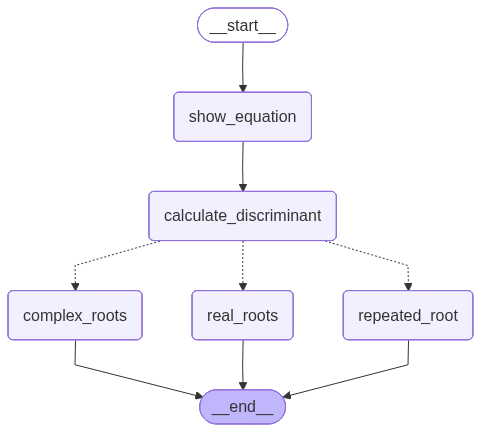

In [21]:
graph = StateGraph(QuadState)

graph.add_node('show_equation',show_equation)
graph.add_node('calculate_discriminant',calculate_discriminant)
graph.add_node('real_roots',real_roots)
graph.add_node('repeated_root',repeated_root)
graph.add_node('complex_roots',complex_roots)



graph.add_edge(START,'show_equation')
graph.add_edge('show_equation','calculate_discriminant')
graph.add_conditional_edges('calculate_discriminant',check_condition)
graph.add_edge('real_roots',END)
graph.add_edge('repeated_root',END)
graph.add_edge('complex_roots',END)
workflow = graph.compile()
workflow

In [22]:
inital_state = {'a' : 1,'b':2,'c':0}
workflow.invoke(inital_state)

{'a': 1,
 'b': 2,
 'c': 0,
 'equation': '1x^2 + 2x + 0 = 0',
 'discriminant': 4,
 'result': 'Real roots: 0.0 and -2.0'}